In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

ModuleNotFoundError: No module named 'scipy'

# Solving Normal Problems with scipy.stats
## Calculating $P(X \leq 4)$ for $X \sim N(5, 20)$

In [12]:
## using scipy.stats.norm:
stats.norm.cdf(4, 5, 20)

0.48006119416162751

In [20]:
## norm.cdf takes first argument x, second of mean, third of sigma (SD)
## recall formatting for printing:
float("%.2f" % stats.norm.cdf(4, 5, 20))

0.48

## Calculating $P(X > 4)$ for $X \sim N(5, 20)$

Using "1 minus" rule to obtain $P(X>4)$ from $1-P(X\leq4)$:

In [21]:
1-stats.norm.cdf(4, 5, 20)

0.51993880583837249

## Calculating $P(0<X<4)$ as the difference of $P(X<4)$ and $P(X<0)$:

In [24]:
pg0l4 = stats.norm.cdf(4, 5, 20) - stats.norm.cdf(0, 5, 20)
pg0l4

0.078767519844551215

# Solving Inverted Normal Problems with scipy.stats
## If $X \sim N(10,2)$, find $x_0$ such that $P(X\leq x_0)=0.95$

In [6]:
## use the inverse of the normal CDF function:
stats.norm.ppf(0.95, 10, 2)

13.289707253902945

## Solving problems of the form: $P(-z_0 < Z < z_0) = 0.8$

Recall that $P(-z_0 < Z < z_0) = 0.8$ is the same as $2P(Z<z_0)-1=0.8$. Thus, doing a little algebra we have: $P(Z<z_0)=0.9$. The problem has simplified to the form just solved above!

In [25]:
stats.norm.ppf(0.9, 0, 1) ## mean 0, sd 1 (it's a Z!!)

1.2815515655446004

# Creating a normal quantile (QQ) Plot in Python

Read in heart data:

In [3]:
heart = pd.read_csv("/Path/To/heart.csv")

NameError: name 'pd' is not defined

If you were to print **heart** above, you'll notice that there are NaN values - NaN is a special character meaning Not a Number. This happens because of the form of **heart.csv**. In fact, this csv file contains empty cells for each variable, indicating missing data for some subjects. We need to be careful below to assure that we only use non-missing data in our calculations! We'll use the **pd.DataFrame.dropna()** function to help us with this prior to using **scipy.stats.probplot()**:

The **scipy.stats** function **probplot()** with **matplotlib.pyplot** will do it - below is a QQ plot for MDI:

Please note that in the below, to obtain the correct calculation of the standard deviation (**SD**), you must set argument **ddof** equal to 1 in the **numpy.std()** function:

In [1]:
## create new MDI variable with NaN values dropped
MDInew = heart['MDI'].dropna()
stdMDI = (MDInew-np.mean(MDInew)) / np.std(MDInew, ddof = 1)
stats.probplot(stdMDI, plot=plt)
plt.title("Normal Q-Q Plot: MDI")
plt.ylabel("Observed Quantiles")
plt.show()

NameError: name 'heart' is not defined

Below is the QQ plot for PDI: 

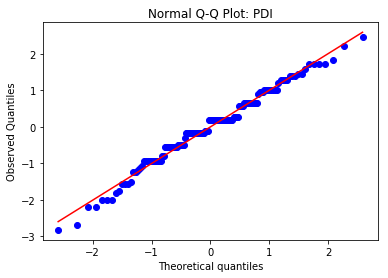

In [28]:
## standardize the data:
PDInew = heart['PDI'].dropna()
stdPDI = (PDInew-np.mean(PDInew)) / np.std(PDInew, ddof = 1)
stats.probplot(stdPDI, plot=plt)
plt.title("Normal Q-Q Plot: PDI")
plt.ylabel("Observed Quantiles")
plt.show()